In [4]:
import pandas as pd

In [157]:
df1.loc[231]

Chr        chr6
TSS    41493838
TES    41495816
A             0
B             2
C             1
Name: 231, dtype: object

In [171]:
df1=pd.read_csv('union_all_3.txt', delimiter='	', header=-1, names= ['Chr', 'TSS','TES', 'A','B', 'C'])
df1.shape

(415, 6)

In [173]:
A_Sum=df1['A'].sum()
B_Sum=df1['B'].sum()
C_Sum=df1['C'].sum()
df1.loc[df1.index[df1['A']>1], ['A']]=1
df1.loc[df1.index[df1['B']>1], ['B']]=1
df1.loc[df1.index[df1['C']>1], ['C']]=1

In [175]:
df1['ABC']=df1['A']+df1['B']+df1['C']
df1['AB']=df1['A']+df1['B']
df1['BC']=df1['B']+df1['C']
df1['AC']=df1['A']+df1['C']
df1.head()

,Chr,TSS,TES,A,B,C,ABC,AB,BC,AC
0,chr1,16678696,16679061,0,1,0,1,1,1,0
1,chr1,20730584,20730997,0,1,0,1,1,1,0
2,chr1,24012136,24012461,0,1,0,1,1,1,0
3,chr1,36823939,36824266,0,1,0,1,1,1,0
4,chr1,51641738,51642253,0,1,0,1,1,1,0


In [177]:
print("A",A_Sum)
print("B",B_Sum)
print("C",C_Sum)

print("AB",df1['AB'].value_counts()[2])
print("AC",df1['AC'].value_counts()[2])
print("BC",df1['BC'].value_counts()[2])
print("ABC",df1['ABC'].value_counts()[3])

('A', 85)
('B', 318)
('C', 165)
('AB', 37)
('AC', 32)
('BC', 110)
('ABC', 27)


In [169]:
df1.index[df1['B']>1]
df1['B'].sum()
#print("B",df1['B'].value_counts()[1:])

318

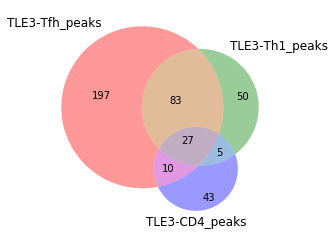

In [145]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles

##
center=df1['ABC'].value_counts()[3]
AB_com=df1['AB'].value_counts()[2]-center
AC_com=df1['AC'].value_counts()[2]-center
BC_com=df1['BC'].value_counts()[2]-center

A_solo=A_Sum-AB_com-AC_com-center
B_solo=B_Sum-AB_com-BC_com-center
C_solo=C_Sum-AC_com-BC_com-center


v=venn3(subsets = (A_solo, B_solo, AB_com, C_solo,AC_com,BC_com,center), \
        set_labels = ('TLE3-Tfh_peaks', 'TLE3-Th1_peaks', 'TLE3-CD4_peaks'))
#c=venn3_circles(subsets = (10, 8, 22, 6,9,4,2), linestyle='dashed', linewidth=1, color="grey")
plt.show()
